In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pred = pd.read_csv('/content/test.csv')
data = pd.read_csv('/content/train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(data.shape)
data=np.array(data)     #converting them to numpy array
m, n = data.shape
np.random.shuffle(data)

(42000, 785)


In [4]:
#train_x and y
train=data[0:33600].T
print(train)
xtrain=train[1:]
xtrain=xtrain/255. #normalize
ytrain=train[0]


#test x and y
test=data[33600:].T
print(test)
xtest=test[1:]
xtest=xtest/255. #normalize
ytest=test[0]

[[0 1 7 ... 5 4 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[2 8 5 ... 0 1 6]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
def paramaeters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = paramaeters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = gradient_descent(xtrain, ytrain, 0.1, 500)

Iteration:  0
[0 9 2 ... 5 5 3] [0 1 7 ... 5 4 1]
0.08613095238095238
Iteration:  10
[0 0 2 ... 5 5 5] [0 1 7 ... 5 4 1]
0.11532738095238096
Iteration:  20
[0 0 3 ... 5 0 5] [0 1 7 ... 5 4 1]
0.16
Iteration:  30
[0 0 3 ... 5 0 3] [0 1 7 ... 5 4 1]
0.20708333333333334
Iteration:  40
[0 0 4 ... 5 0 3] [0 1 7 ... 5 4 1]
0.264077380952381
Iteration:  50
[0 0 4 ... 3 0 3] [0 1 7 ... 5 4 1]
0.35642857142857143
Iteration:  60
[2 0 4 ... 3 6 3] [0 1 7 ... 5 4 1]
0.4325
Iteration:  70
[2 1 4 ... 3 6 1] [0 1 7 ... 5 4 1]
0.49452380952380953
Iteration:  80
[2 1 4 ... 3 6 1] [0 1 7 ... 5 4 1]
0.5357142857142857
Iteration:  90
[2 1 4 ... 3 6 1] [0 1 7 ... 5 4 1]
0.568125
Iteration:  100
[2 1 7 ... 3 6 1] [0 1 7 ... 5 4 1]
0.5993452380952381
Iteration:  110
[2 1 7 ... 3 6 1] [0 1 7 ... 5 4 1]
0.6259523809523809
Iteration:  120
[2 1 9 ... 3 6 1] [0 1 7 ... 5 4 1]
0.6495833333333333
Iteration:  130
[2 1 9 ... 3 6 1] [0 1 7 ... 5 4 1]
0.6704464285714286
Iteration:  140
[2 1 9 ... 3 6 1] [0 1 7 ... 5 4 

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = xtrain[:, index, None]
    prediction = make_predictions(xtrain[:, index, None], W1, b1, W2, b2)
    label = ytrain[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


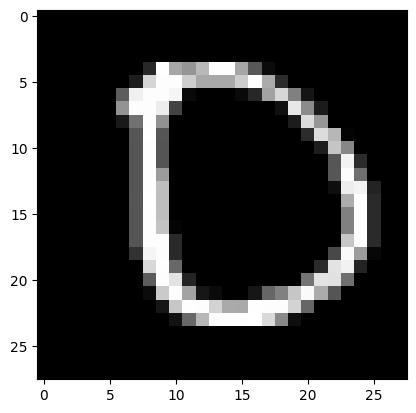

Prediction:  [1]
Label:  1


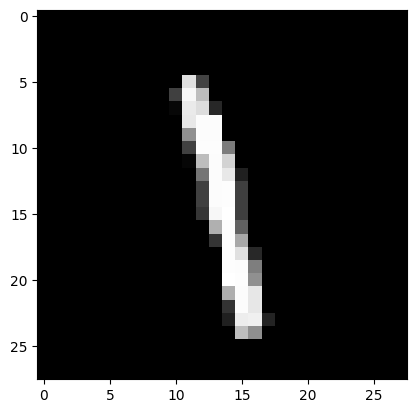

Prediction:  [7]
Label:  7


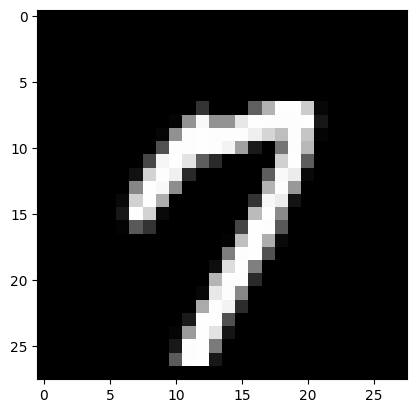

Prediction:  [9]
Label:  9


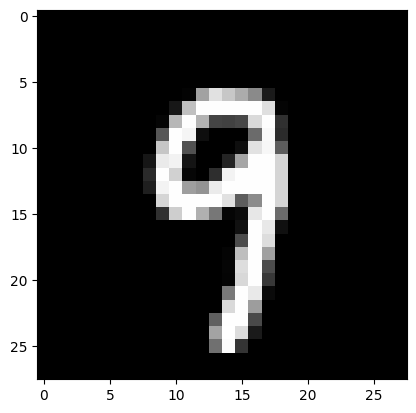

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [15]:
#testing
prediction = make_predictions(xtest, W1, b1, W2, b2)
get_accuracy(prediction, ytest)

[2 8 6 ... 0 1 6] [2 8 5 ... 0 1 6]


0.8464285714285714

predict for unlabelled data in testcsv (pred)